# Preprocessing

In [1]:
# Import here Needed Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Data Loading
df = pd.read_csv('Mart_Sales.csv')

In [4]:
# show first and last 5 rows
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# shape of the data
df.shape

(8523, 12)

In [7]:
# Describe
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Handling missing values

Before doing anything, find out where the "missing" in the data are

In [122]:
# check missing values
missing = df.isna().sum()
print(missing)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


okay now we found number of missing values

- <b> features to be removed ---> 80%  is nan
- <b> features to filled --------> less than 80 %
- <b> observation to be removed --> less than 3%

In [8]:
# percentage of the missing values
missing_perc = df.isna().mean() *100
print(missing_perc)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [9]:
# Okay both of the missing 2 columns are numerical column, Categorial so what do you think we will fill the 2 Null values columns with????
# # if null count is > 3% and < 80%  fill it by mean
# if null count is < 3% remove this row that contain this null value

missing_perc = df.isna().mean() *100

for col in df.columns:
    if missing_perc[col]< 3 and missing_perc[col] >0:
        df = df[df[col].notnull()]
    elif missing_perc[col] >3 and missing_perc[col]< 80:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0]) 
        else:
            df[col] = df[col].fillna(df[col].mean())
print(df.isnull().sum().sum())            

0


In [10]:
# lets check if the missing values are filled or not
print(df.isnull().sum())      

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [11]:
# Okay now lets check if there is duplicates in the data
df.duplicated().sum()

0

# Handling outliers

know we will check for the outliers and we will trys 2 ways.

how the boxplot visualize
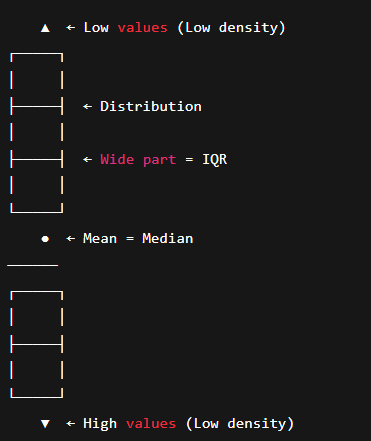

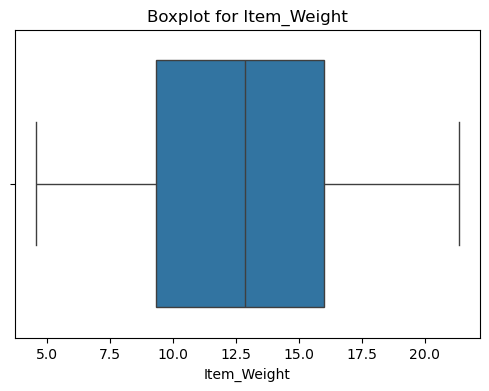

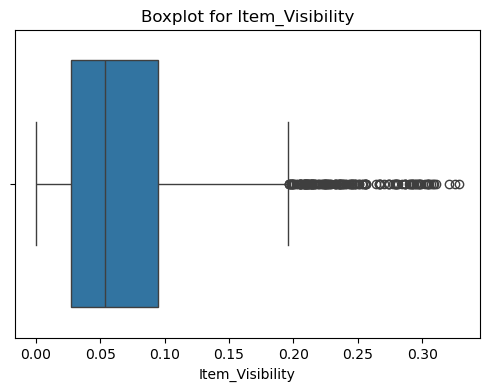

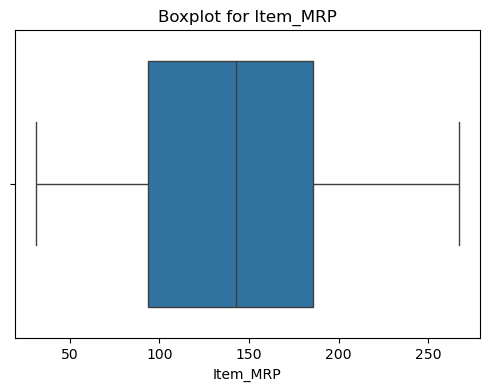

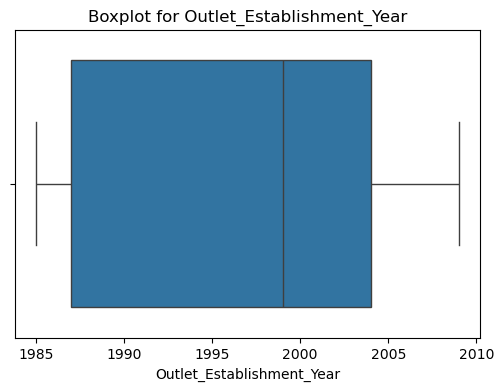

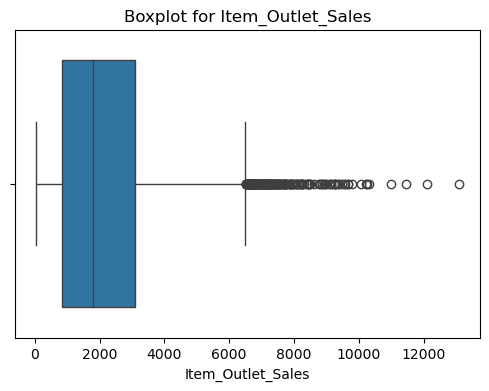

In [12]:
#Boxplot Method (Visualization)
# don't forget to make sure that while using boxplot or checking the outliers you can't pass any categorical columns

numerical_columns = ['Item_Weight','Item_Visibility','Item_MRP',
                    'Outlet_Establishment_Year','Item_Outlet_Sales']

for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [13]:
#IQR Method

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    
    outliers_cnt = df[(df[col] < lb) | (df[col] > ub)].shape[0]
    
    print(col)
    print("Number of outliers:", outliers_cnt)

Item_Weight
Number of outliers: 0
Item_Visibility
Number of outliers: 144
Item_MRP
Number of outliers: 0
Outlet_Establishment_Year
Number of outliers: 0
Item_Outlet_Sales
Number of outliers: 186


now you will see 2 columns with outliers and we will try to handle oultiers in those 2 columns

In [14]:
# Handling Outliers using IQR Method
# Two ways:
# Deleting rows  --> Use when outliers % is small (<5%)
# Capping values --> Use in production to avoid data loss

oultiers_column = ['Item_Outlet_Sales','Item_Visibility']


    # CAPPING OUTLIERS (SAFE METHOD)
    # Use When:
    # - You don't want to lose data
    # - Working in production
    # - Column has important extreme values
for col in oultiers_column:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)
    #print(f"{col} cleaned using capping method")
    
    # DELETING OUTLIERS (WORKING)
    # Use when:
    # - Dataset is large
    # - Outliers percentage is very small
    # - Column is NOT target variable
for col in oultiers_column:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Deleting
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    
print("Final dataset shape:", df.shape)

Final dataset shape: (8523, 12)


# Skewness Handling


In [15]:
# N = number of rows
# N = train_data.shape[0]

# Calculate skewness for numeric features
n = df.shape[0]
skewness = {}

for col in numerical_columns:
    x = df[col].values
    mean_x = x.mean()
    std_x = x.std()  
    
    skew_val = (n/((n-1)*(n-2)))*sum(((x-mean_x)/std_x)**3)
    skewness[col] = skew_val

print("Skewness of numeric features:")
for col, val in skewness.items():
    print(f"{col:<30} {val:.6f}")

Skewness of numeric features:
Item_Weight                    0.090577
Item_Visibility                0.814123
Item_MRP                       0.127225
Outlet_Establishment_Year      -0.396711
Item_Outlet_Sales              0.874760


In [16]:
# Apply log transformation for features with |skewness| > 1
for col in numerical_columns:
    if abs(skewness[col])>1:
        df[col] = np.log1p(df[col])
print(f"Applied log transformation to {col}")

Applied log transformation to Item_Outlet_Sales


# Encoding Categorical columns

In [20]:
#Encode categorical features with label encoding
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size',
                       'Outlet_Location_Type','Outlet_Type']

le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
    print(f"Label encoded {col}")

Label encoded Item_Identifier
Label encoded Item_Fat_Content
Label encoded Item_Type
Label encoded Outlet_Identifier
Label encoded Outlet_Size
Label encoded Outlet_Location_Type
Label encoded Outlet_Type
